Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
圖片檔案: /content/dogcatimages/dog02.jpg


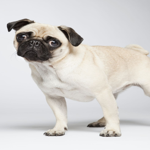

1/1 [==============================] - 0s 156ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/cat01.jpg


1/1 [==============================] - 0s 55ms/step
預測結果：貓
圖片檔案: /content/dogcatimages/cat02.jpg


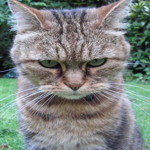

1/1 [==============================] - 0s 60ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/dog01.jpg


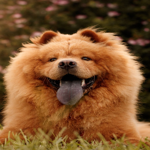

1/1 [==============================] - 0s 60ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/cat04.png


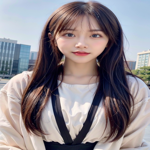

1/1 [==============================] - 0s 53ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/dog03.jpg


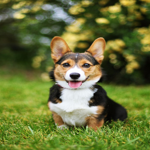

1/1 [==============================] - 0s 38ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/dog04.jpg


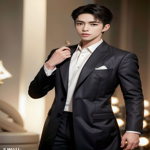

1/1 [==============================] - 0s 31ms/step
預測結果：狗
圖片檔案: /content/dogcatimages/cat03.jpg


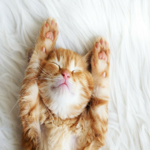

1/1 [==============================] - 0s 32ms/step
預測結果：貓


In [2]:
from google.colab import drive
from keras.models import load_model
from IPython.display import display
import zipfile
import io
import os
import numpy as np
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# 定義模型路徑
model_path = '/content/drive/My Drive/Dogcat_Model/dogcatmodel.h5'  # 模型路徑

# 載入模型
model = load_model(model_path)

# 解壓縮圖片檔案
zip_file_path = '/content/drive/My Drive/Dogcat_Model/dogcatimages.zip'  # 壓縮檔案路徑
extracted_path = '/content/dogcatimages'  # 解壓縮後的路徑

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# 函式：預測並顯示結果
def predict_and_display(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # 調整圖片大小以符合模型需求（如果有需要）
    display(img)

    img = np.array(img) / 255.0  # 正規化圖片數值（依照模型訓練時的預處理）
    img = np.expand_dims(img, axis=0)  # 加入 batch 維度

    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        print("預測結果：貓")
    else:
        print("預測結果：狗")

# 讀取並預測圖片
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):  # 確認檔案是圖片格式
            file_path = os.path.join(root, file)
            print('圖片檔案:', file_path)
            predict_and_display(file_path)